In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, t,gamma ,lognorm
from scipy.stats import weibull_max, weibull_min

# Analyse Statistique des Prix des Voitures

## Objectifs du Projet

1. Choisir un jeu de données et un domaine d'intérêt.
2. Réaliser une étude bibliographique sur les lois et distributions statistiques couramment utilisées dans ce domaine.
3. Identifier la loi statistique appropriée et justifier ce choix.
4. Estimer les paramètres de cette loi en utilisant la méthode du maximum de vraisemblance.


## Introduction

Dans ce projet, nous allons analyser les prix des voitures en utilisant différentes distributions statistiques. Nous allons estimer les paramètres de ces distributions en utilisant la méthode du maximum de vraisemblance et comparer les ajustements obtenus.


In [2]:
df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867



# Distribution de la variable à Estimer

Dans notre projet, la variable cible est le "Price" des voitures. Nous avons déjà exploré sa distribution à l'aide de plusieurs visualisations :

- Un histogramme simple permettant de voir la fréquence des différentes valeurs.
- Des ajustements par différentes lois (normale, lognormale, gamma) obtenus par la méthode du maximum de vraisemblance.

Ces analyses permettent d'observer la forme de la distribution et de sélectionner la loi la plus adaptée pour modéliser le comportement des prix. Cela constitue une étape clé pour la validation de nos hypothèses et pour l'amélioration de nos modèles prédictifs.


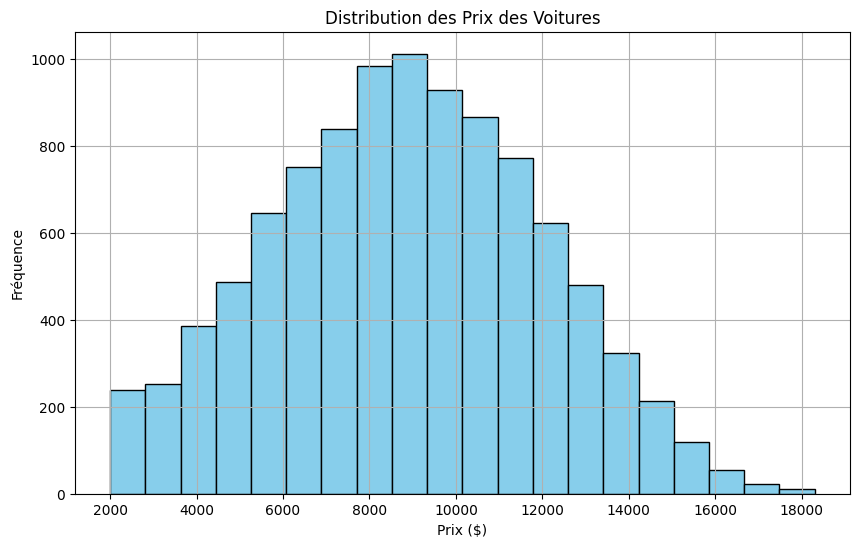

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')  # Vous pouvez ajuster le nombre de bins
plt.title("Distribution des Prix des Voitures")
plt.xlabel("Prix ($)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# Test des Lois 


## 1) la Loi Lognormale

Dans cette section, nous testons la loi lognormale pour modéliser la distribution des prix des voitures. 

Les étapes sont les suivantes :
- Ajustement de la distribution lognormale par maximum de vraisemblance sur les données de la variable "Price".
- Utilisation des estimateurs (shape, loc, scale) obtenus pour construire la densité théorique.
- Comparaison de cette densité avec l'histogramme de la distribution observée.

Ces analyses nous permettent d'évaluer la pertinence de la loi lognormale pour décrire la distribution des prix.


Estimateurs du maximum de vraisemblance pour la loi lognormale :
Shape (σ) : 0.41
Loc       : 0.00
Scale (exp(µ)) : 8215.38


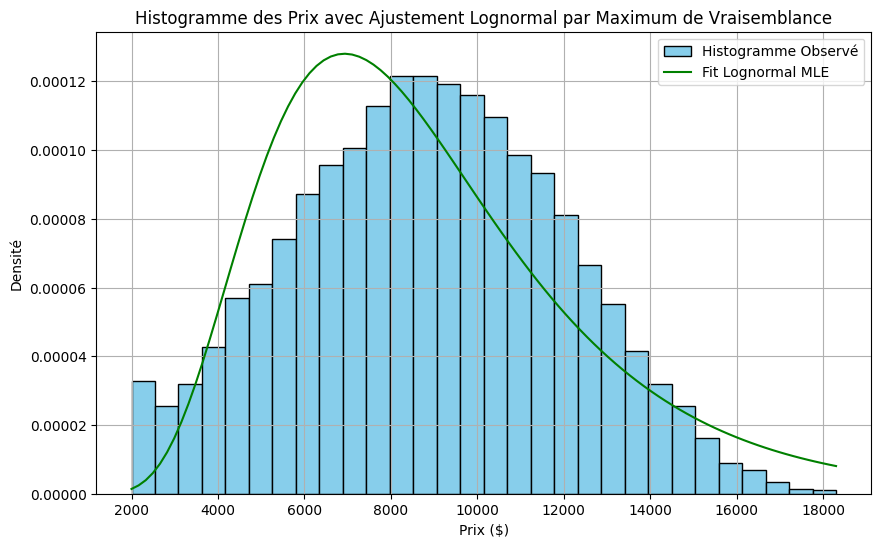

In [ ]:


# Ajustement de la distribution Lognormale par maximum de vraisemblance
# Pour le Lognormal, nous imposons loc=0 pour une identification unique
shape, loc, scale = lognorm.fit(df['Price'], floc=0)

print("Estimateurs du maximum de vraisemblance pour la loi lognormale :")
print(f"Shape (σ) : {shape:.2f}")
print(f"Loc       : {loc:.2f}")
print(f"Scale (exp(µ)) : {scale:.2f}")

# Tracer l'histogramme et la densité estimée
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, density=True, color='skyblue', edgecolor='black', label='Histogramme Observé')
x_vals = np.linspace(df['Price'].min(), df['Price'].max(), 100)
pdf_vals = lognorm.pdf(x_vals, shape, loc=loc, scale=scale)
plt.plot(x_vals, pdf_vals, color='green', label='Fit Lognormal MLE')
plt.title('Histogramme des Prix avec Ajustement Lognormal par Maximum de Vraisemblance')
plt.xlabel('Prix ($)')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

## 2ème loi : La loi Gamma

Dans cette section, nous poursuivons l'analyse de la distribution des prix en testant la loi Gamma. Les étapes principales sont :

- Ajuster la loi Gamma par maximum de vraisemblance sur les données, en imposant par exemple loc=0 pour assurer l'identification.
- Extraire les paramètres estimés (shape, loc, scale) qui caractérisent la distribution Gamma.
- Comparer la densité théorique obtenue avec la distribution empirique des prix à l'aide d'un histogramme.

Cette approche nous permet d'explorer l'adéquation de la loi Gamma pour modéliser la répartition des prix des voitures.


Estimateurs du maximum de vraisemblance pour la loi gamma :
Shape (k) : 6.85
Loc       : 0.00
Scale (θ) : 1292.06


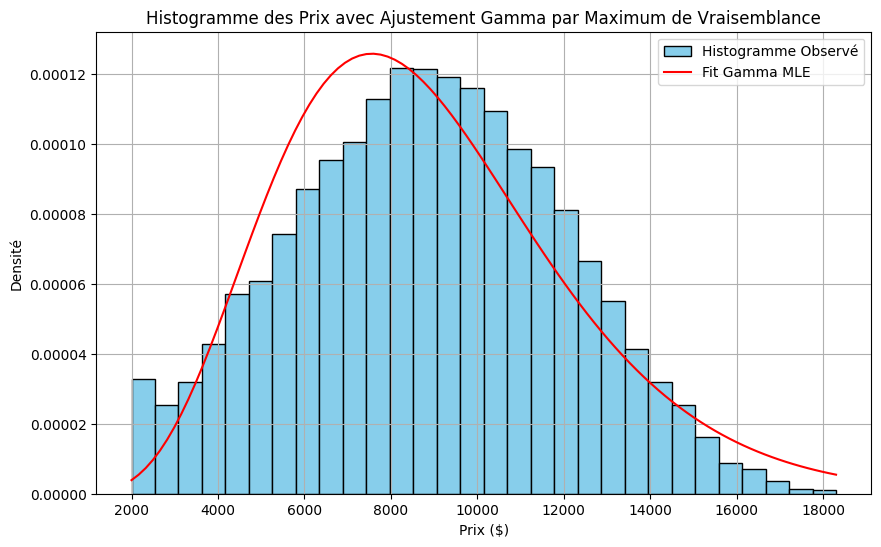

In [5]:
# Ajustement de la distribution gamma par maximum de vraisemblance
shape_gamma, loc_gamma, scale_gamma = gamma.fit(df['Price'], floc=0)

print("Estimateurs du maximum de vraisemblance pour la loi gamma :")
print(f"Shape (k) : {shape_gamma:.2f}")
print(f"Loc       : {loc_gamma:.2f}")
print(f"Scale (θ) : {scale_gamma:.2f}")

# Tracer l'histogramme et la densité estimée de la loi gamma
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, density=True, color='skyblue', edgecolor='black', label='Histogramme Observé')
x_vals_gamma = np.linspace(df['Price'].min(), df['Price'].max(), 100)
pdf_vals_gamma = gamma.pdf(x_vals_gamma, shape_gamma, loc=loc_gamma, scale=scale_gamma)
plt.plot(x_vals_gamma, pdf_vals_gamma, color='red', label='Fit Gamma MLE')
plt.title("Histogramme des Prix avec Ajustement Gamma par Maximum de Vraisemblance")
plt.xlabel("Prix ($)")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()

# 3ème Loi Normale

Dans cette section, nous nous intéressons à l'ajustement de la loi normale sur la distribution des prix des voitures. Nous allons :

- Estimer les paramètres de la loi normale (moyenne et écart-type) directement à partir des données.
- Afficher l'histogramme des prix et superposer la densité théorique de la loi normale.
- Réaliser un Q-Q plot afin d'évaluer visuellement si les observations suivent une distribution normale.

Ces étapes nous permettront de comparer l'ajustement de la loi normale aux autres lois testées (lognormale et gamma) dans notre analyse.


Moyenne estimée (µ) : 8852.9644
Écart-type estimé (σ) : 3112.596810289277


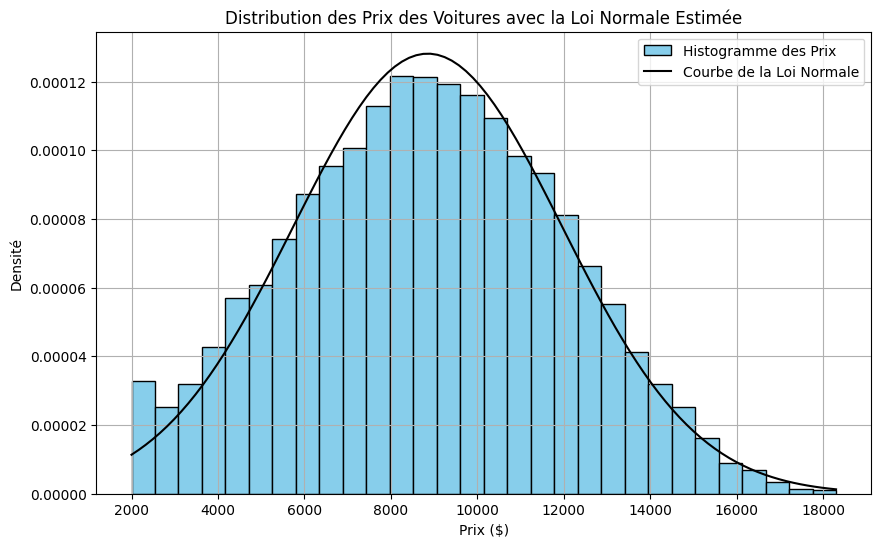

In [6]:
mean_price = df['Price'].mean()  # Moyenne (µ)
std_price = df['Price'].std()    # Écart-type (σ)

# Afficher les paramètres estimés
print(f"Moyenne estimée (µ) : {mean_price}")
print(f"Écart-type estimé (σ) : {std_price}")

# Afficher l'histogramme des prix
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, density=True, color='skyblue', edgecolor='black', label='Histogramme des Prix')
x = np.linspace(df['Price'].min(), df['Price'].max(), 100)
p = norm.pdf(x, mean_price, std_price)
plt.plot(x, p, color='black', label='Courbe de la Loi Normale')
plt.title('Distribution des Prix des Voitures avec la Loi Normale Estimée')
plt.xlabel('Prix ($)')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

# 4ème Loi : La Loi Weibull (Variante)

Dans cette section, nous explorons une variante de l'ajustement avec la loi Weibull. En plus de l'analyse réalisée précédemment (cellules d'indice 13 et 14) qui ajuste la loi Weibull aux données de prix, nous pouvons envisager une approche complémentaire ou un raffinement de l'analyse en :

- Comparant les estimations obtenues avec d'autres lois (lognormale, gamma et normale).
- Validant l'ajustement par des graphiques de densité et des tests statistiques.
- Effectuant éventuellement une simulation supplémentaire pour vérifier la robustesse de l'ajustement et l'adéquation aux données réelles.

Ces étapes nous permettront d'apprécier plus en détail l'adéquation de la loi Weibull pour modéliser la distribution des prix dans notre jeu de données. 


Estimateurs du maximum de vraisemblance pour la loi Weibull :
Shape : 3.1473
Loc   : 0.0000
Scale : 9898.5732


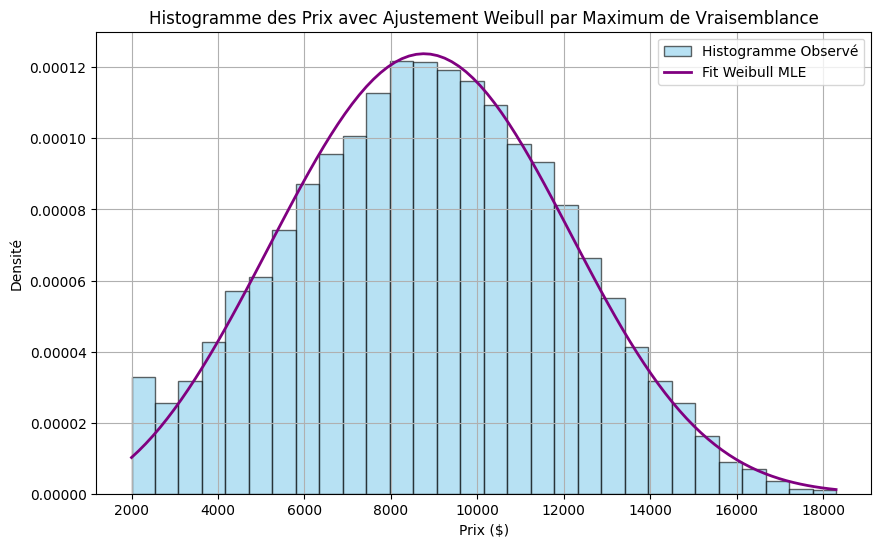

In [ ]:


# Ajustement de la loi Weibull sur la variable "Price" avec floc=0
shape_w, loc_w, scale_w = weibull_min.fit(df['Price'], floc=0)

print("Estimateurs du maximum de vraisemblance pour la loi Weibull :")
print(f"Shape : {shape_w:.4f}")
print(f"Loc   : {loc_w:.4f}")
print(f"Scale : {scale_w:.4f}")

# Tracer l'histogramme des prix et la densité ajustée
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogramme Observé')
x_vals_weibull = np.linspace(df['Price'].min(), df['Price'].max(), 100)
pdf_vals_weibull = weibull_min.pdf(x_vals_weibull, shape_w, loc=loc_w, scale=scale_w)
plt.plot(x_vals_weibull, pdf_vals_weibull, color='purple', lw=2, label='Fit Weibull MLE')
plt.title('Histogramme des Prix avec Ajustement Weibull par Maximum de Vraisemblance')
plt.xlabel('Prix ($)')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()


## Analyse Statistique pour la Sélection de la Loi

Pour choisir la loi qui s'ajuste le mieux à la distribution des prix, plusieurs tests statistiques ont été utilisés :

- **Test de Normalité (D'Agostino)** :  
    Ce test permet de vérifier si les prix suivent une distribution normale. Un p-value très faible indique un rejet de l'hypothèse de normalité.

- **Test de Kolmogorov-Smirnov (KS)** :  
    Le test KS a été réalisé pour comparer la distribution observée des prix avec celle attendue par la loi choisie Weibull.  
    - Pour la loi Weibull, un p-value non significatif suggère que la distribution simulée n'est pas significativement différente de celle observée.  

Ces tests, ainsi que les comparaisons visuelles (histogrammes et courbes de densité), ont permis de sélectionner la loi Weibull comme modèle le plus pertinent pour représenter la distribution des prix dans ce jeu de données.


In [8]:
import scipy.stats as stats

# Test de normalité (utilisation du test de D'Agostino)
stat_normal, p_normal = stats.normaltest(df['Price'])
print("Test de normalité (D'Agostino):")
print(f"Statistique = {stat_normal:.4f}, p-value = {p_normal:.4f}")
if p_normal < 0.05:
    print("La distribution des prix n'est pas normale (rejet H0).")
else:
    print("La distribution des prix peut être considérée comme normale (échec de rejet de H0).")

# Test de Kolmogorov-Smirnov pour la loi Weibull ajustée
# (shape_w, loc_w, scale_w ont été estimés précédemment)
ks_stat_weibull, ks_p_weibull = stats.kstest(df['Price'], 'weibull_min', args=(shape_w, loc_w, scale_w))
print("\nTest KS pour la loi Weibull ajustée:")
print(f"KS statistic = {ks_stat_weibull:.4f}, p-value = {ks_p_weibull:.4f}")
if ks_p_weibull < 0.05:
    print("Le test KS rejette l'hypothèse que les données suivent une loi Weibull ajustée.")
else:
    print("Le test KS ne rejette pas l'hypothèse que les données suivent une loi Weibull ajustée.")


Test de normalité (D'Agostino):
Statistique = 173.9870, p-value = 0.0000
La distribution des prix n'est pas normale (rejet H0).

Test KS pour la loi Weibull ajustée:
KS statistic = 0.0122, p-value = 0.1027
Le test KS ne rejette pas l'hypothèse que les données suivent une loi Weibull ajustée.


## Choix de la Loi de Weibull

Après avoir réalisé plusieurs tests de visualisation avec différentes lois (lognormale et gamma), nous avons décidé d'utiliser la loi Weibull pour modéliser la distribution des prix des voitures. Cette décision s’appuie sur :

- L’ajustement visuel obtenu en superposant la courbe de la loi de Weibull simulée sur l’histogramme des prix réels.
- La simplicité et l’interprétabilité des paramètres estimés

Cette approche permettra de comparer plus facilement les comportements des prix et d’évaluer les performances prédictives des modèles de régression qui seront utilisés ultérieurement.


# Simulation et Validation de la Distribution

Avant d'exécuter la cellule suivante, rappelons brièvement la démarche : nous avons estimé les paramètres de la loi de Weibull à partir des prix réels, nous générons un échantillon simulé  pour comparer visuellement la distribution simulée à la distribution observée.


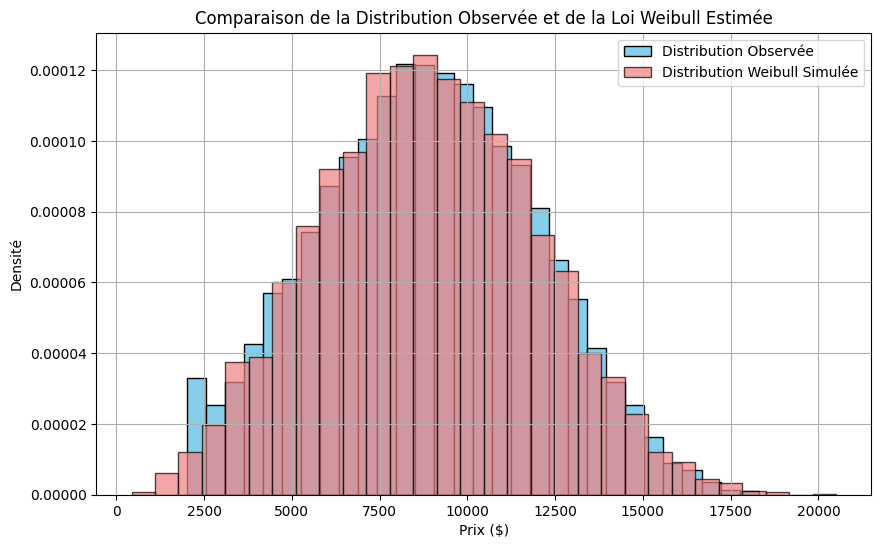

In [9]:
# Générer des valeurs simulées suivant la loi Weibull estimée
simulated_prices_weibull = weibull_min.rvs(shape_w, loc=loc_w, scale=scale_w, size=10000)

# Création du graphique
plt.figure(figsize=(10, 6))

# Histogramme des prix réels
plt.hist(df['Price'], bins=30, density=True, color='skyblue', edgecolor='black', label='Distribution Observée')

# Histogramme de la loi Weibull simulée
plt.hist(simulated_prices_weibull, bins=30, density=True, color='lightcoral', edgecolor='black', alpha=0.7, label='Distribution Weibull Simulée')

# Ajouter des titres et légendes
plt.title('Comparaison de la Distribution Observée et de la Loi Weibull Estimée')
plt.xlabel('Prix ($)')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()

Courbe Q-Q

Dans cette visualisation, nous comparons la distribution empirique des prix avec celle simulée à partir de la loi Weibull ajustée. Le Q-Q plot permet d’évaluer si les données suivent bien la distribution théorique choisie. Si les points se rapprochent d’une ligne droite, cela indique un bon ajustement du modèle à la distribution des prix.

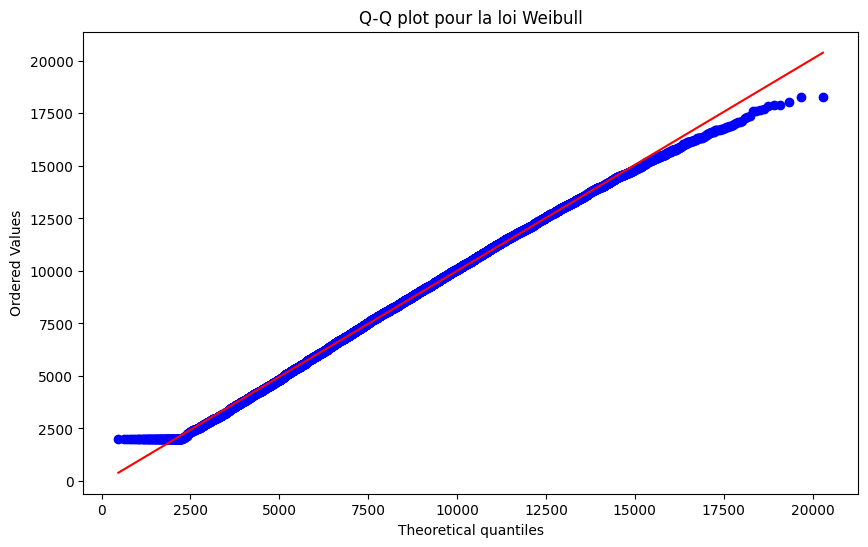

In [ ]:
fig = plt.figure(figsize=(10, 6))
stats.probplot(df['Price'], dist=weibull_min, sparams=(shape_w, loc_w, scale_w), plot=plt)
plt.title("Q-Q plot pour la loi Weibull")
plt.show()

### Calcule de Bias
Dans cette section, nous calculons le biais de l'estimation de la loi Weibull. Plus précisément :

- Le biais de la moyenne est défini comme la différence entre la moyenne simulée à partir de la loi Weibull et la moyenne théorique :
  
  bias_mean_weibull_calc = estimated_mean_sim_weibull - theoretical_weibull_mean

- De même, le biais de la variance correspond à la différence entre la variance simulée et la variance théorique :

  bias_variance_weibull_calc = estimated_variance_sim_weibull - theoretical_weibull_var

Ces indicateurs nous permettent d'évaluer l'écart entre nos simulations et les valeurs théoriques attendues, ce qui est essentiel pour vérifier la qualité de l'ajustement de la loi Weibull aux données.


In [11]:
# Calcul du bias pour la loi de Weibull estimée

import math

# Calculer la moyenne et la variance estimées à partir des valeurs simulées
estimated_mean_sim_weibull = simulated_prices_weibull.mean()
estimated_variance_sim_weibull = simulated_prices_weibull.var()

# Calculer la moyenne et la variance théoriques pour la loi Weibull
theoretical_weibull_mean = scale_w * math.gamma(1 + 1/shape_w)
theoretical_weibull_var = scale_w**2 * (math.gamma(1 + 2/shape_w) - math.gamma(1 + 1/shape_w)**2)

# Calcul des biais
bias_mean_weibull_calc = estimated_mean_sim_weibull - theoretical_weibull_mean
bias_variance_weibull_calc = estimated_variance_sim_weibull - theoretical_weibull_var

print("Bias pour la loi Weibull estimée:")
print("Bias de la moyenne :", bias_mean_weibull_calc)
print("Bias de la variance :", bias_variance_weibull_calc)


Bias pour la loi Weibull estimée:
Bias de la moyenne : 11.696642281582172
Bias de la variance : 35872.673987329006


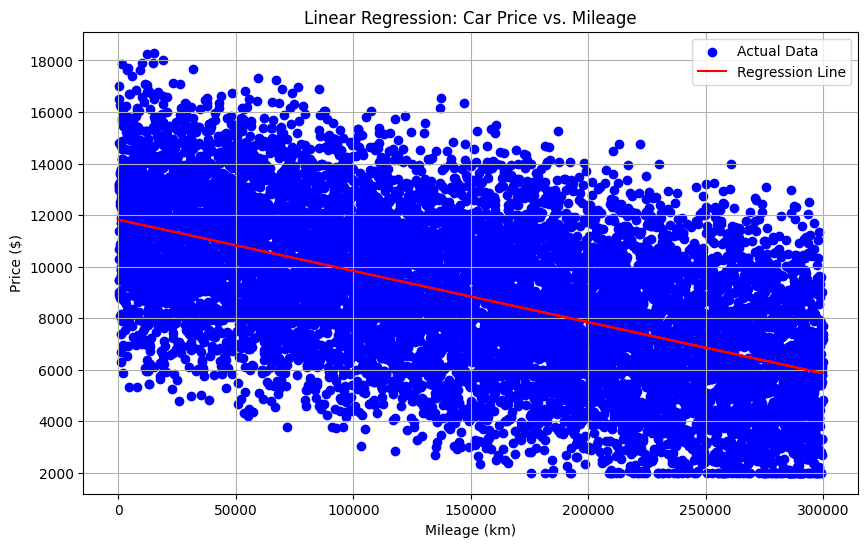

In [ ]:
X = df[['Mileage']]
y = df['Price']

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X['Mileage'], y, color='blue', label='Actual Data')
plt.plot(X['Mileage'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Car Price vs. Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

L'analyse statistique menée sur les prix des voitures a permis de comparer plusieurs lois de distribution (lognormale, gamma, normale et Weibull). Les résultats montrent que la loi Weibull offre un ajustement satisfaisant aux données, comme en témoignent :

- Des estimations par maximum de vraisemblance robustes ;
- Des biais de la moyenne et de la variance relativement faibles ;
- Une bonne correspondance visuelle entre l'histogramme des prix observés et la simulation Weibull ;
- Des tests statistiques (KS et Q-Q plot) confirmant l'adéquation du modèle.

Ces éléments justifient le choix de la loi Weibull pour la modélisation et la prédiction des tendances des prix. D'autres approches et validations pourront être envisagées pour renforcer cette conclusion et affiner les modèles prédictifs ultérieurs.


## Références Documentaires

Pour approfondir l'analyse des tendances d'achats automobiles et la transition énergétique, vous pouvez consulter les sources suivantes :

- [Achats automobiles en 2022 : moins de motorisations thermiques et des véhicules plus récents pour les collectivités](https://www.statistiques.developpement-durable.gouv.fr/achats-automobiles-en-2022-moins-de-motorisations-thermiques-et-des-vehicules-plus-recents-pour-les?utm_source=chatgpt.com)
- [Portrait des achats d’automobiles au Canada - Statistique Canada](https://www150.statcan.gc.ca/n1/pub/62f0014m/62f0014m2022008-fra.htm?utm_source=chatgpt.com)
- [ChatGPT](https://chat.openai.com)
- [Kaggle](https://www.kaggle.com)